# E1 260: Optimization for Machine Learning and Data Science

**Homework 3: Constrained optimization (Projected, Proximal, FW, and mirror descent methods)**


This homework as two parts. In the first part, there are 5 questions related to theoretical aspects of constrained optimization. In the second part, we apply the theory developed in the course in this module to some popular problems, namely, robust regression and LASSO.

**Submission instructions:**


*   **Make a copy of the Colab .ipynb file** and **share the link of your Colab file with answers** as instructed.
* Use text cells to answer Part A of the homework. Type equations in Latex in a text cell.
* For the programming part of Part B of the homework, use code cell and text cell. The submitted codes should compile without any errors and do not erase the outputs.




---










In [ ]:
# Name: Imandi Bhargava Veera Lakshmana Raju
# SR number: 21190
# Program: MTech - CSA
# Registration type (Credit/Audit): Credit



---



## Part A

This part has 10 questions.

**[10 pts] Question 1.** Compute the projection operator $P_C({\bf x})$ for the following constraint sets.

1.   *Unit simplex*: $\mathcal{C}=\{{\bf x} : {\bf 1}^T{\bf x} = 1, {\bf x} \succeq {\bf 0}\}$. 
2.   *Intersection of hyperplane and rectangle*:  $\mathcal{C}=\{{\bf x} : {\bf a}^T{\bf x} = b, l \leq {\bf x} \leq u\}$. 







**Solution 1.**

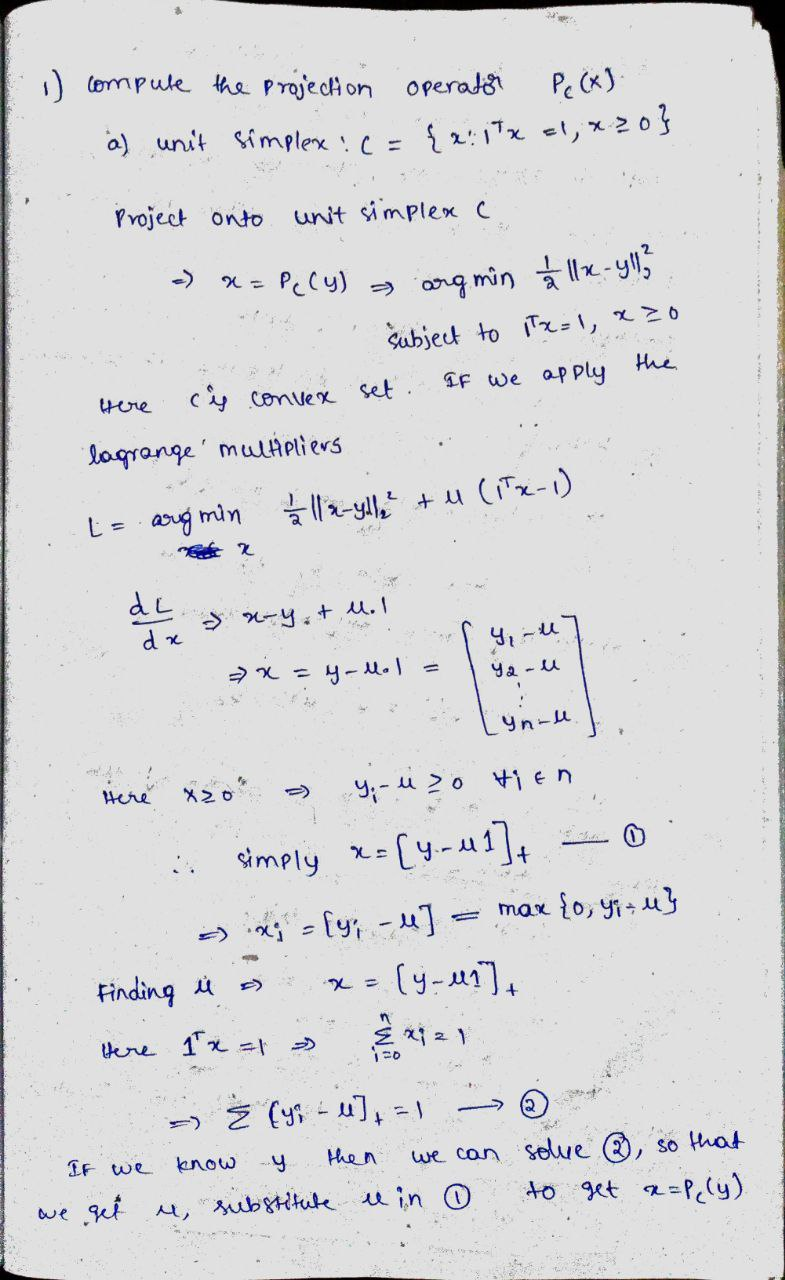


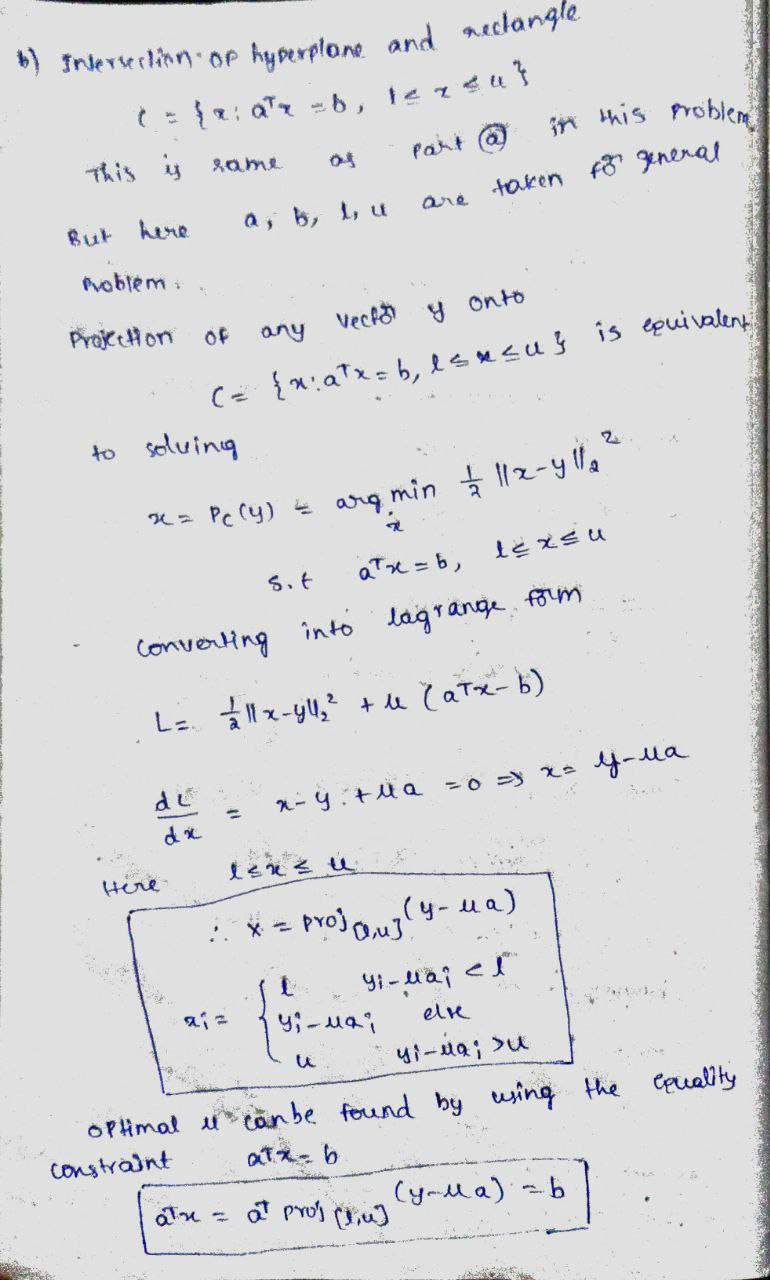

**[10 pts] Question 2.** Prove the following.




1.   If $f({\bf x}) = g(\|{\bf x}\|_2)$ with ${\rm dom}(g) = [0,\infty)$, then 
$$
{\rm prox}_f({\bf x}) = {\rm prox}_g(\|{\bf x}\|_2)\frac{{\bf x}}{\|{\bf x}\|_2} \quad \forall{\bf x} \neq {\bf 0}.
$$
2.   Suppose $f$ is a closed convex function, and 
$f^*({\bf x}) = {\rm sup}_{{\bf z}}
\{ \langle{\bf x},{\bf z}\rangle - f({\bf z})\}$ 
is the convex conjgate of $f$. Then we have the Moreau decomposition
$$
{\bf x} = {\rm prox}_f({\bf x}) + {\rm prox}_{f^*}({\bf x}).
$$





**Solution 2.**

Enter your answer here

**[10 pts] Question 3.** Compute the mirror descent updates for minimizing a differentiable function on a spectrahedron
$$
\mathcal{S}_n = \{{\bf X} \in \mathbb{S}_+^n : {\rm trace}({\bf X}) = 1\}
$$
with
$$
\varphi({\bf X}) = \sum_{i=1}^n \lambda_i({\bf X}) \log \lambda_i({\bf X}).
$$

Here, $\lambda_1({\bf X}), \ldots, \lambda_n({\bf X})$ are the eigenvalues of ${\bf X}$.

Also, compute the Bregman divergence and the update equation with 
$$
\varphi({\bf X}) = \sum_{i=1}^n \lambda_i({\bf X}) \log \lambda_i({\bf X}) - \lambda_i({\bf X}).
$$
(This results in the so-called von Neumann divergence.)


**Solution 3.**


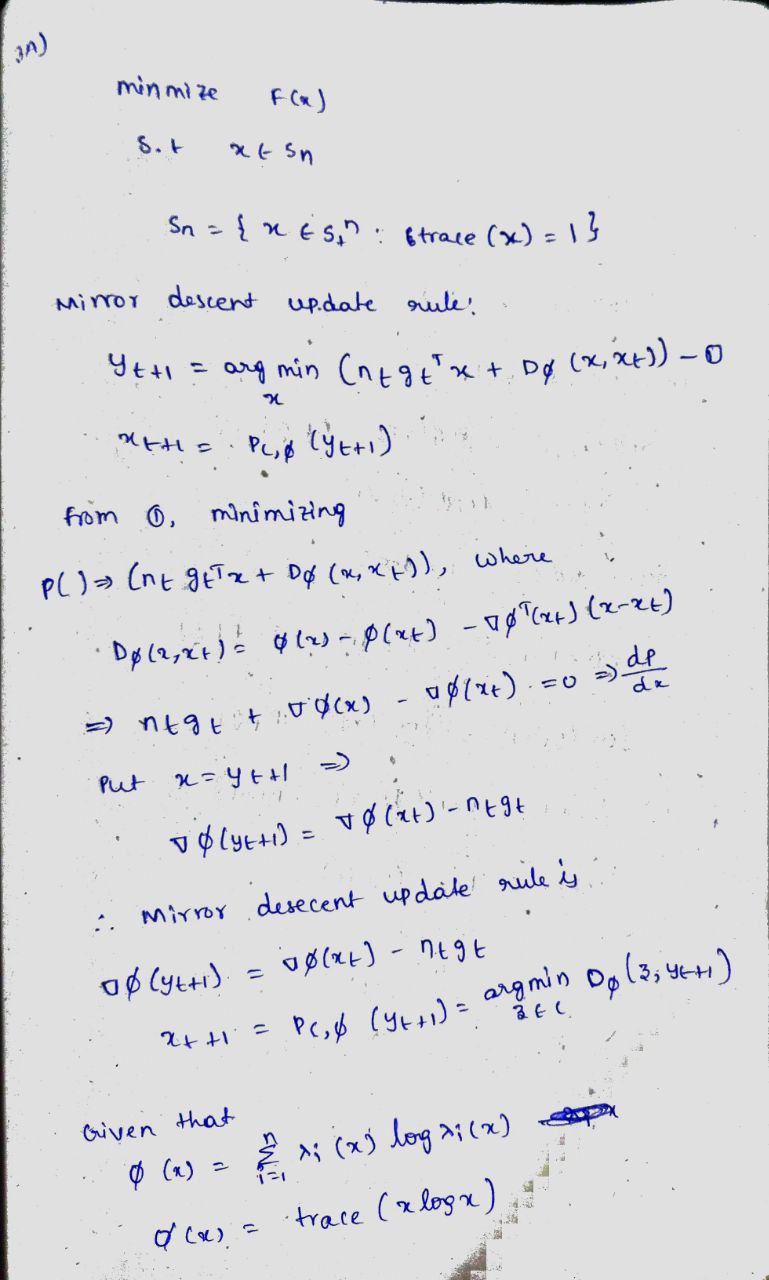

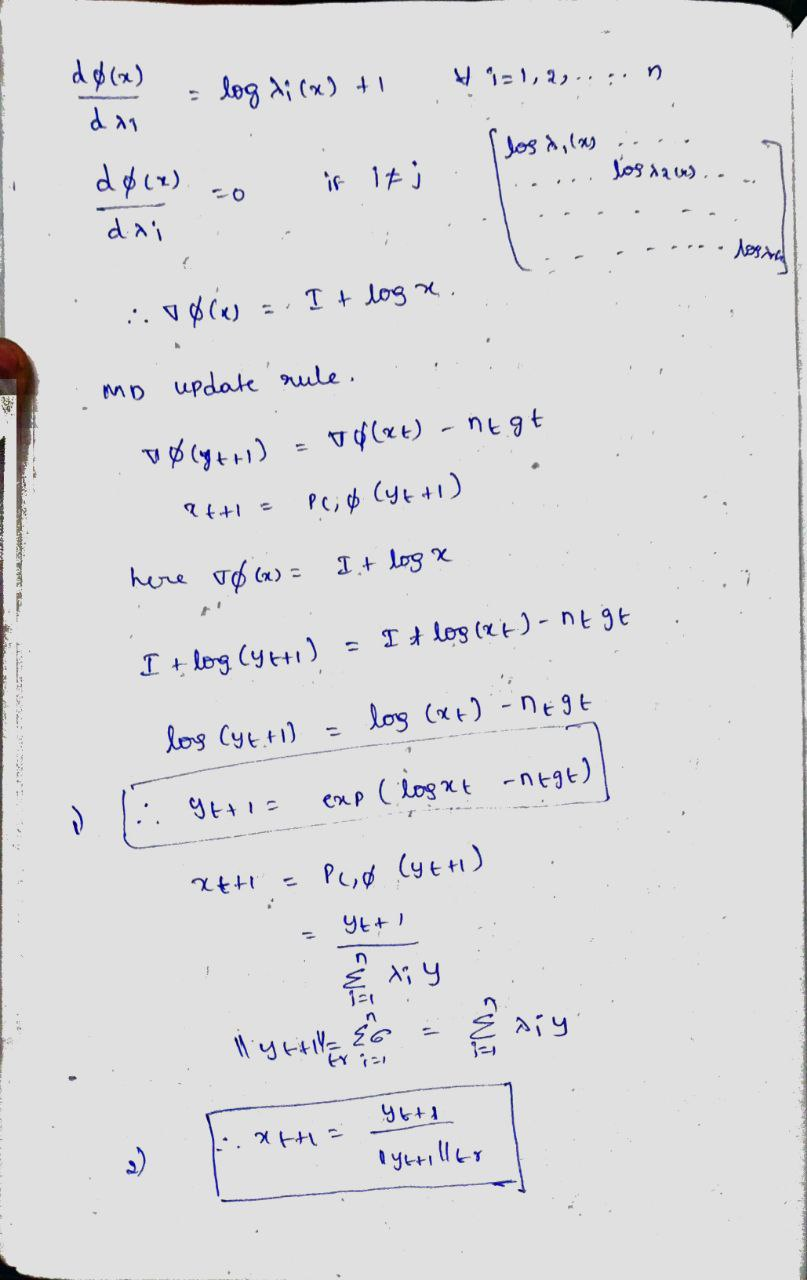

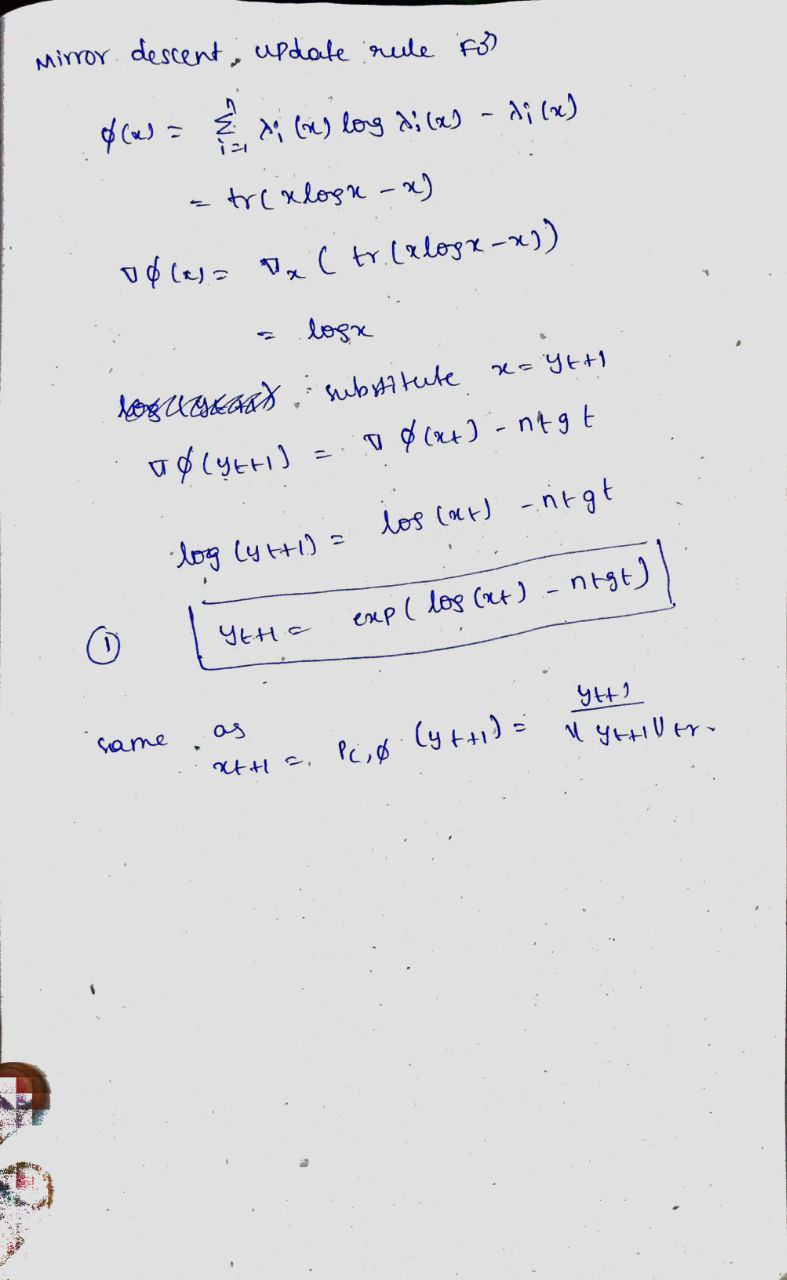

**[10 pts] Question 4.**  Compute the Frank-Wolfe updates for the following optimization problem

$$
\text{minimize} \quad f({\bf X}) \quad \text{subject to} \quad \|{\bf X}\|_{\rm tr} \leq t
$$

where $\|\cdot\|_{\rm tr}$ is the trace norm.



**Solution 4.**

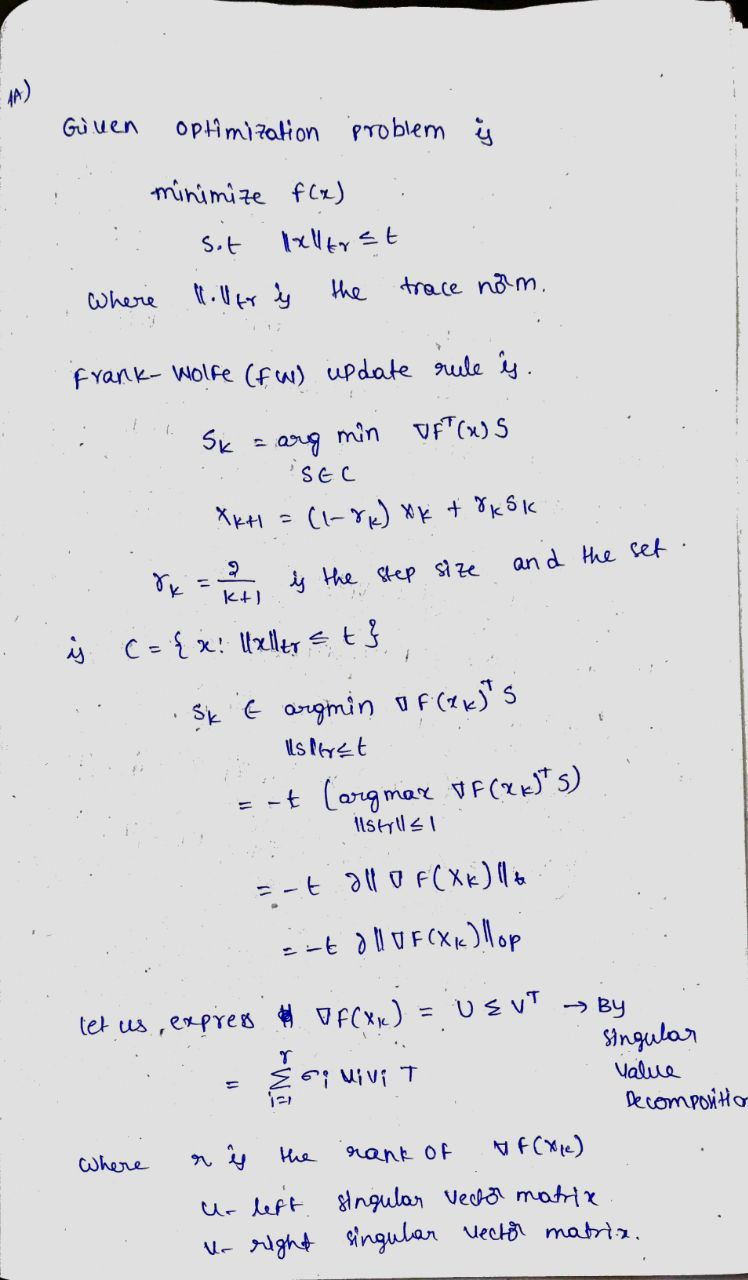

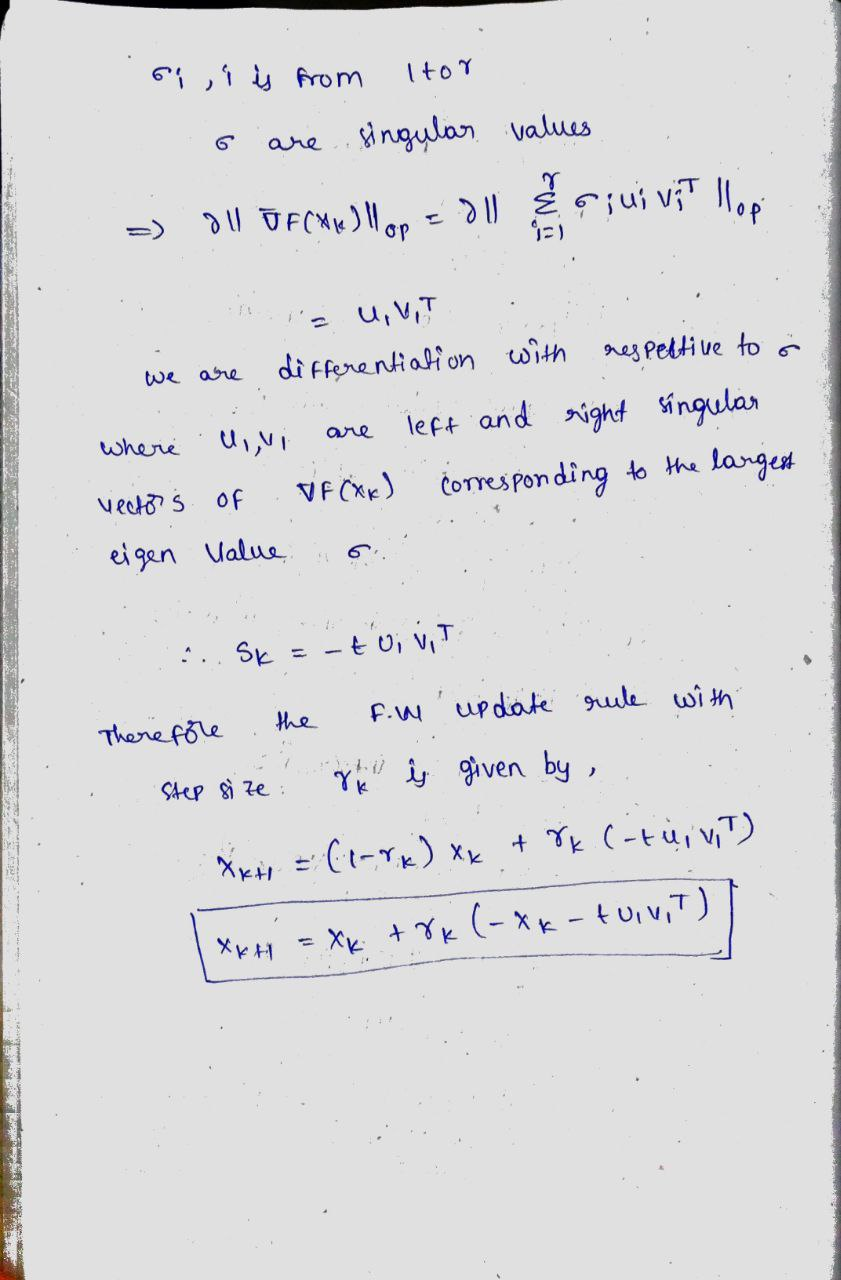

**[10 pts] Question 5.** Show that the duality gap of the Frank-Wolfe iterations is given by
$$
\langle \nabla f({\bf x}_k), {\bf x}_k - {\bf s}_k\rangle,
$$
where ${\bf s}_k$ is the solution to the linear minimization problem in the Frank-Wolfe algorithm. 

Also, show that 
$$
f({\bf x}_k) - f^\star \leq \langle \nabla f({\bf x}_k), {\bf x}_k - {\bf s}_k\rangle. 
$$





**Solution 5.**

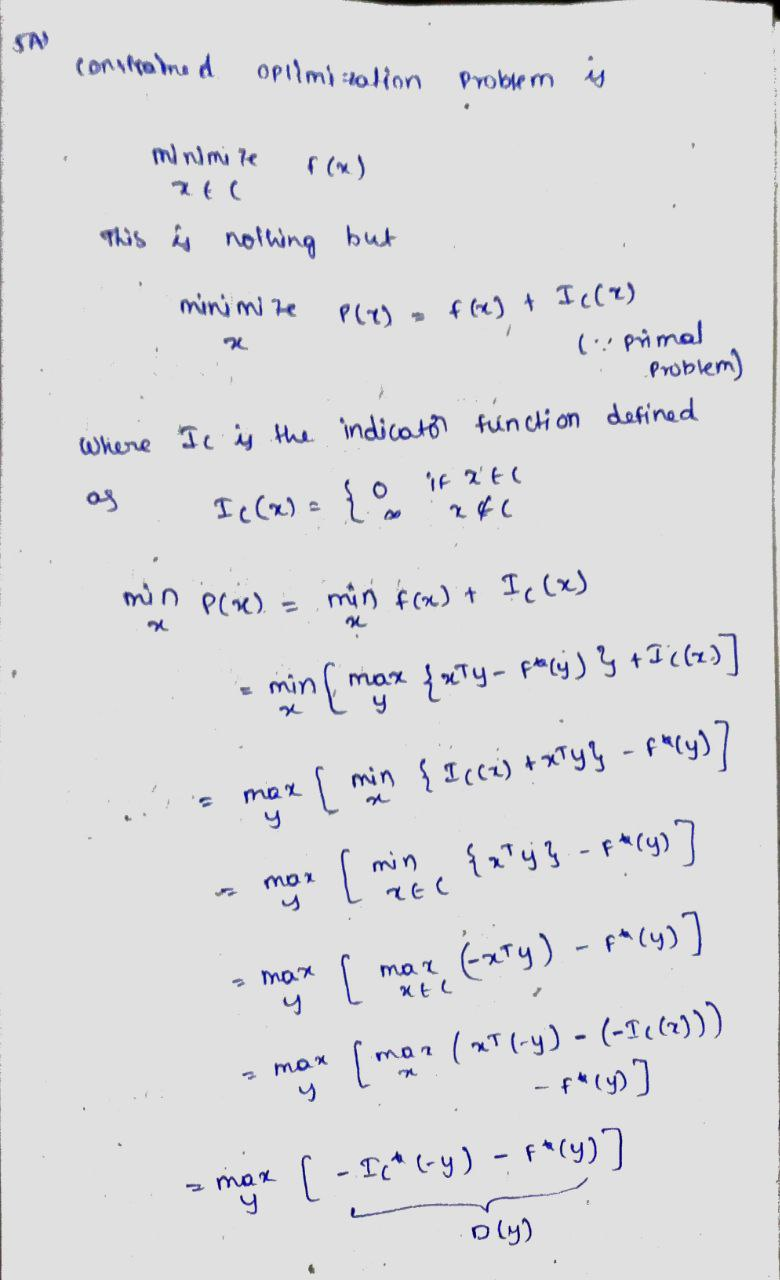

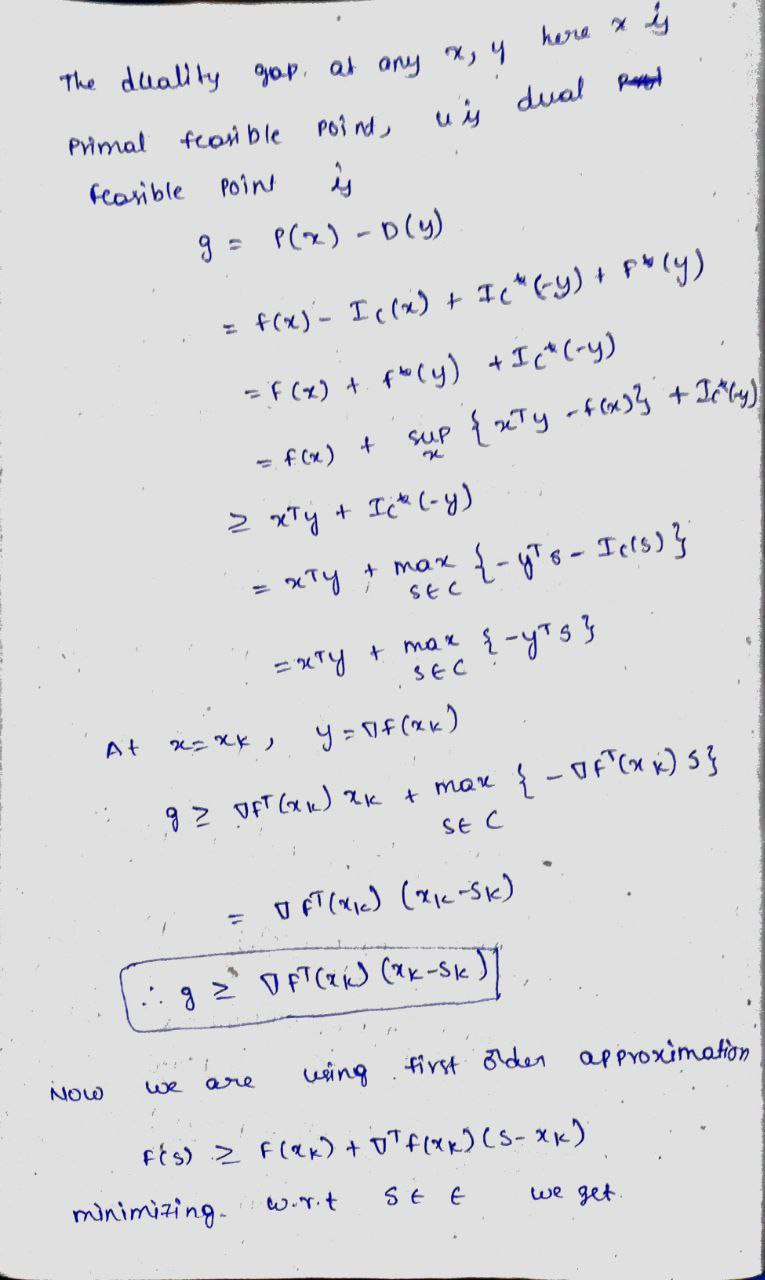

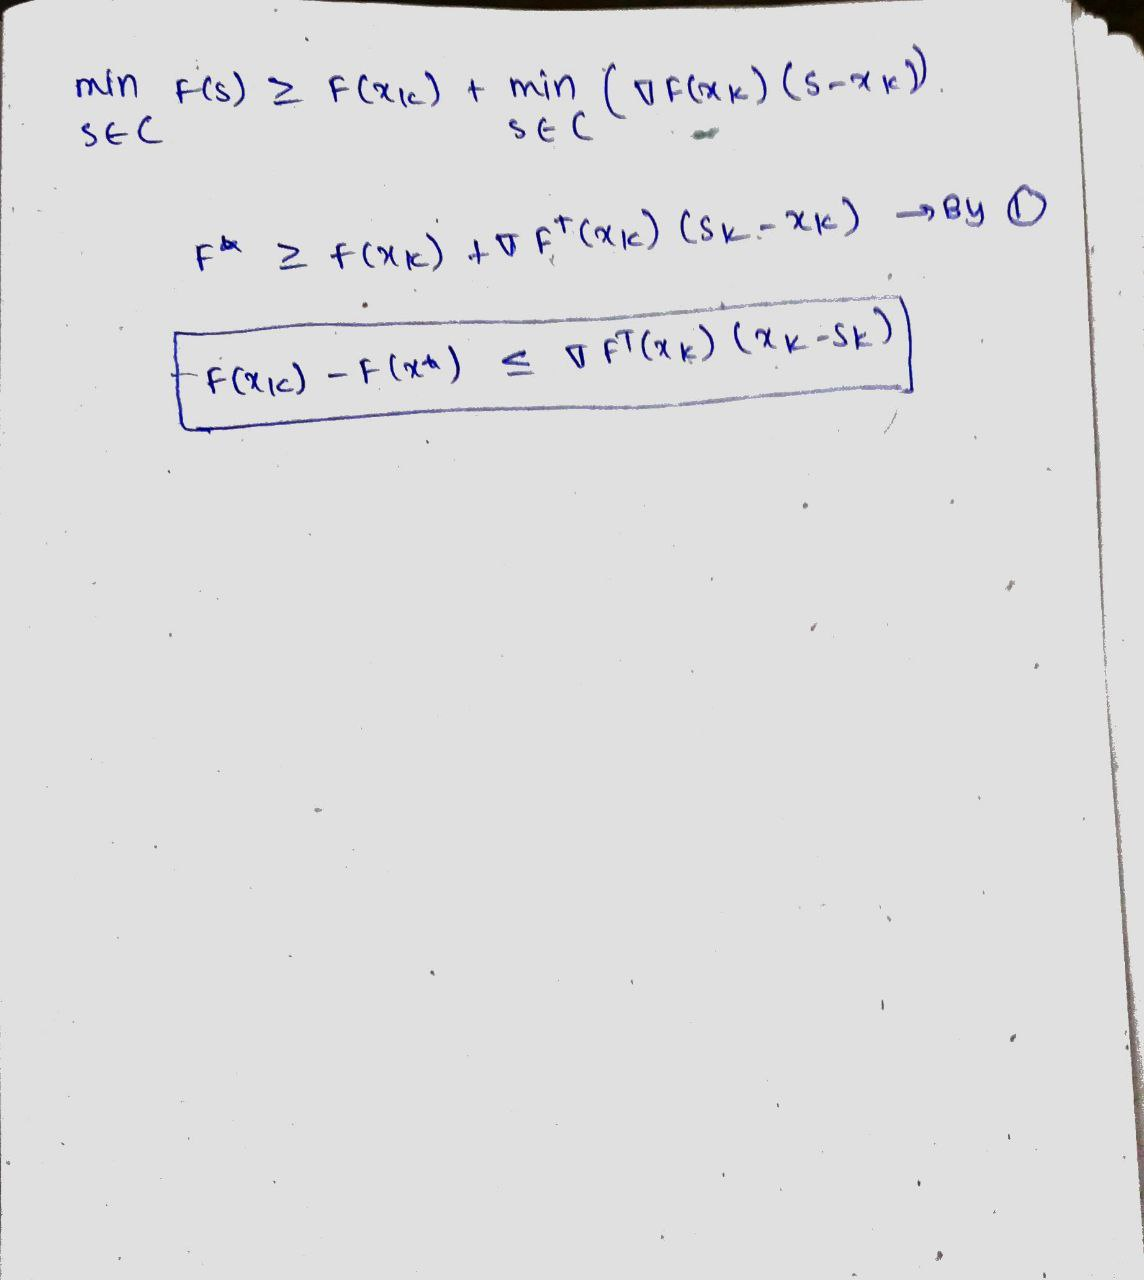





---



---



## Part B

This part has three programming questions on understanding of gradient descent, Huber regression and piecewise-linear optimization.

**[10 pts] Question 6.** The Frank-Wolfe method.


The aim of this question is to understand the Frank-Wolfe iterations for minimizing the simple two-dimensional quadratic form

$$f(\mathbf{x}) = \frac{1}{2}({\bf x} - {\bf x}^\star)^T({\bf x} - {\bf x}^\star)$$

over a polygon (square) with end points 
$(-0.5,-0.5),(0.5,-0.5),(0.5,0.5), (-0.5,0.5)$.

Suppose we initialize at ${\bf x}_0 = [-0.5,0.5]^T$. Display the first 20 Frank-Wolfe iterations on a contour plot (see e.g., the figure below) for the two cases with
${\bf x}^\star = [1,0.3]^T$ and ${\bf x}^\star = [0,0]^T$.

Comment on your observations.


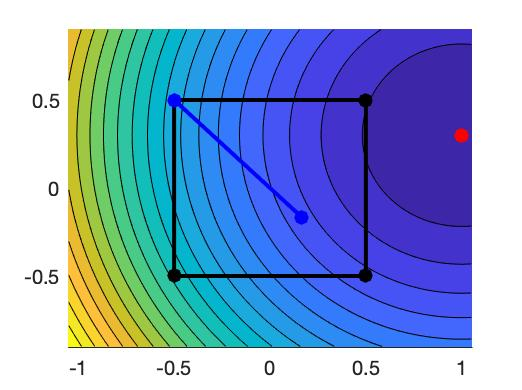




Text(0.5, 1.0, 'X_opt = [0,0]')

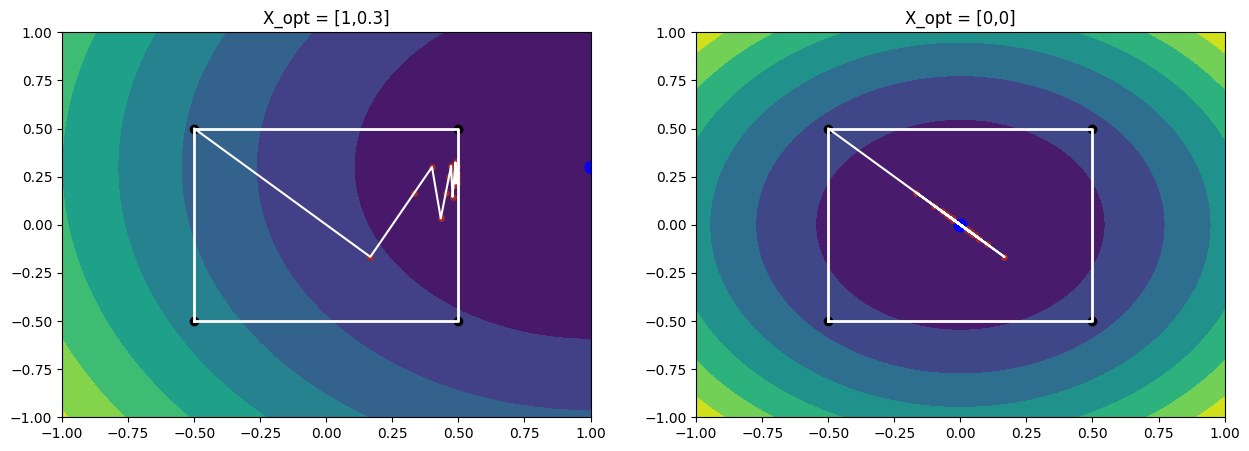

In [ ]:
## Solution 6.
import numpy as np
import matplotlib.pyplot as plt

def funValue(x1,x2,x_opt):
  value = 0.5*(x1-x_opt[0])**2 + 0.5*(x2-x_opt[1])**2
  return value

def gradient(X,x_opt):
  return np.array(X)-np.array(x_opt)

def Frank_Wolf(x_int,x_opt):
  X =[]
  X.append(x_int)
  for i in range(1,20):
    gamma = 2/(i+2)
    grad_val = gradient(X[i-1],x_opt)
    ind = np.argmin(np.dot(grad_val,box.T))
    s = box[ind,:]
    X.append(X[i-1] + gamma*(s-X[i-1]))
  return X

x_int = [-0.5,0.5]
box = np.array([[-0.5,-0.5],[0.5,-0.5],[0.5,0.5],[-0.5,0.5]])
box_plot = np.array([[-0.5,-0.5],[0.5,-0.5],[0.5,0.5],[-0.5,0.5],[-0.5,-0.5]])

feature_x = np.linspace(-1, 1, 100)
feature_y = np.linspace(-1, 1, 100)
[x1, x2] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 2,figsize=(15, 5))

x_opt = [1,0.3]
fun_vals = funValue(x1,x2,x_opt)
ax[0].contourf(x1, x2, fun_vals)
ax[0].plot(box_plot[:,0],box_plot[:,1],'w',linewidth = 2)
ax[0].scatter(box[:,0],box[:,1],color = 'black')
ax[0].scatter(x_opt[0],x_opt[1],color = 'b',linewidths= 4)
X = Frank_Wolf(x_int,x_opt)
ax[0].plot([i[0] for i in X],[i[1] for i in X],color = 'w')
ax[0].scatter([i[0] for i in X[1:]],[i[1] for i in X[1:]],color="brown",s=15)
ax[0].set_title("X_opt = [1,0.3]")

x_opt = [0,0]
fun_vals = funValue(x1,x2,x_opt)
ax[1].contourf(x1, x2, fun_vals)
ax[1].plot(box_plot[:,0],box_plot[:,1],'w',linewidth = 2)
ax[1].scatter(box[:,0],box[:,1],color = 'black')
ax[1].scatter(x_opt[0],x_opt[1],color = 'b',linewidths= 4)

X = Frank_Wolf(x_int,x_opt)
ax[1].plot([i[0] for i in X],[i[1] for i in X],color = 'w')
ax[1].scatter([i[0] for i in X[1:]],[i[1] for i in X[1:]],color="brown",s=15)
ax[1].set_title("X_opt = [0,0]")





**Observations:**

In first case optimum value [1,0.3] is not in constraint set so the Frank-Wolfe algorthim reaches to the minimum in constraint set  in 20 iterations.

In second case optimum value [0,0] is  in constraint set , so the Frank-Wolfe algorthim doesn't reaches to minimum  in 20 iterations but it is osciliates near  to the minimum.

**[20 pts] Question 7.** Robust regression.

Consider the following robust regression problem

$$
\underset{{\bf x}}{\text{minimize}} \quad f({\bf x}) = \sum\limits_{i=1}^m |{\bf a}_i^T{\bf x} - {b}_i|
$$
subject to

$$
{\bf x} \in \mathcal{C} = \{{\bf x} \in \mathbb{R}^n : {\bf 1}^T{\bf x} = 1, {\bf x}\succeq {\bf 0}\}.
$$
 


**Implementation**

We generate data with $m=20$ measurements and $n=3000$.
We randomly choose ${\bf a}_i \sim {\mathcal N}(0,{\bf I}_{n\times n})$ and 
$$
b_i = \frac{(a_{i,1} + a_{i,2})}{2} + e_i
$$
where $e_i = {\mathcal N}(0,0.01)$


* Implement projected subgradient descent with Polyak stepsize rule.

* Implement mirror descent update (also known as entropic descent) with $\varphi({\bf x}) = \sum_{i=1}^n x_i \log x_i.$


Through simulations, plot the convergence of $f^{\rm best}_k - f^{\rm opt}$. Use 
[CVX solver](https://www.cvxpy.org/examples/index.html) to find $f^{\rm opt}$. 






In [ ]:
## Solution 7.
import numpy as np


## Generate data 
np.random.seed(1)
n = 3000
m = 20
covariance = np.eye(n)
mean = np.zeros(n)

#Generating the data with provided information
A = np.random.multivariate_normal(mean, covariance, size = (m))
b = (A[:, 0].reshape(-1, 1) + A[:, 1].reshape(-1, 1))/2 + np.random.normal(scale=0.01 ,loc=0.0)

In [ ]:
# Solve using cvx
import cvxpy as cp
x_solution = cp.Variable((n,1))
cost = cp.norm1(A @x_solution - b)
prob = cp.Problem(cp.Minimize(cost), [x_solution>=0, cp.sum(x_solution)==1])
prob.solve()
f_opt = np.sum(np.abs(A.dot(x_solution.value)-b))
print(f_opt)

0.1049557580653736


In [ ]:
def funVal(A, b, x):
  cost = np.sum(np.abs(A.dot(x) - b))
  return cost
def getGrad(A, b, x):
  residual = A@x - b
  gradient = A.T.dot(np.sign(residual))
  return gradient

def evalpL(a,y,l,idx,k):
  subset_a = a[idx[k:]]
  subset_y = y[idx[k:]]
  subset_l = l[idx[k]]
  summands = subset_a * (subset_y - subset_l * subset_a)
  result = np.sum(summands) - 1
  return result

def bisectSearch(a,y,l,idx):
  start,end = 0 , len(l)-1
  L = evalpL(a,y,l,idx,start)
  H = evalpL(a,y,l,idx,end)
  if L<0:
    return start
  while (end-start)>1:
    Mid = int((start+end)/2)
    M = evalpL(a,y,l,idx,Mid)
    if M>0:
      start, L = Mid, M
    else:
      end, H = Mid, M
  return end

def Projected(a, y):
  l = y/a
  idx = np.argsort(l, axis = 0)
  k = bisectSearch(a,y,l,idx)
  lam = (np.sum(a[idx[k:]]*y[idx[k:]])-1)/np.sum(a[idx[k:]])
  x = np.maximum(0, y-lam*a)
  return x

In [ ]:
#### Projected sub gradient
from tqdm import tqdm
x_init = np.ones((n,1))/n
x_t = x_init
psgSubOptGap = []
f_t_best = funVal(A, b, x_t)
psgSubOptGap.append(f_t_best - f_opt)
n_iter = 10000
for i in tqdm(range(n_iter)):
  gradient = getGrad(A, b, x_t)
  lr_t = (funVal(A, b, x_t)-f_opt)/(np.linalg.norm(gradient, ord = 2)**2)
  y_t = x_t - lr_t*gradient
  x_t = Projected(np.ones((n, 1)), y_t)
  if funVal(A, b, x_t) < f_t_best:
    f_t_best = funVal(A, b, x_t)
  psgSubOptGap.append(f_t_best - f_opt)

100%|██████████| 10000/10000 [00:21<00:00, 468.94it/s]


In [ ]:
## Mirror descent
x_t = x_init
mirrorSubOptGap = []
f_t_best = funVal(A, b, x_t)
mirrorSubOptGap.append(f_t_best - f_opt)
lr = 0.005
n_iter = 10000
for i in tqdm(range(n_iter)):
  gradient = getGrad(A, b, x_t)
  y_t = x_t*np.exp(-1*lr*gradient)
  x_t = y_t/np.sum(y_t)
  if funVal(A, b, x_t) < f_t_best:
    f_t_best = funVal(A, b, x_t)
  mirrorSubOptGap.append(f_t_best - f_opt)

100%|██████████| 10000/10000 [00:01<00:00, 5066.56it/s]


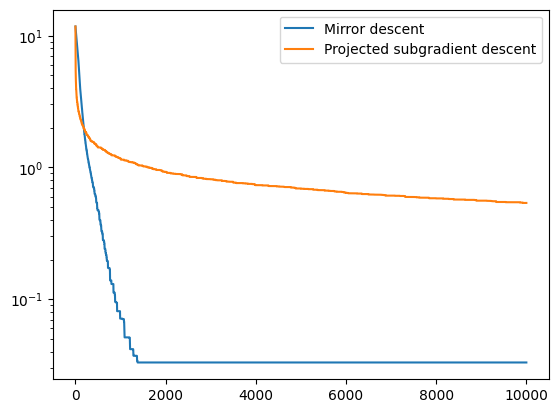

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.semilogy(mirrorSubOptGap)
plt.semilogy(psgSubOptGap)
plt.legend(['Mirror descent', 'Projected subgradient descent'])

**Observations**
Mirror Descent converges much more faster than Projected subgradient descent

**[20 pts] Question 8.** 

Consider the following LASSO problem
$$
\underset{\bf x}{\rm minimize} \,\,  \frac{1}{2}\| {\bf A}{\bf x} - {\bf b}\|_2^2 + \rho \| {\bf x}\|_1 
$$
with variable ${\bf x} \in \mathbb{R}^d$. 

The above problem can be expressed as an equivalent constrained optimization problem
$$
\underset{\bf x}{\rm minimize} \,\, f({\bf x}) = \frac{1}{2}\| {\bf A}{\bf x} - {\bf b}\|_2^2 
$$
subject to
$$
\| {\bf x}\|_1 \leq t.
$$



We generate data with $d = 1000$, i.i.d. Gaussian ${\bf A} \in \mathbb{R}^{2000 \times 1000}$ as $a_{ij} \sim \mathcal{N}(0,1)$ and ${\bf x}$ from a unit normal distribution.


1. Vary the tuning parameters $t$ and $\rho$ to obtain the same minimizer for both the problems.
2. Compare the suboptimality gap, $f({\bf x}_k) - f^\star$, of the proximal gradient method to that of the Frank-Wolfe method. Implement the proximal gradient method with $\eta_k = 1/L$ with $L = \lambda_{\max}({\bf A}^T{\bf A}).$

Use [CVX solver](https://www.cvxpy.org/examples/index.html) to find $f^{\rm opt}$.



In [ ]:
## Solution 8.
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from tqdm import tqdm

## Generate data 
np.random.seed(1)
m = 2000
n = 100
A = np.random.normal(size = (m, n))
x = np.random.normal(size = (n, 1))
b = A.dot(x)

/usr/local/lib/python3.9/dist-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


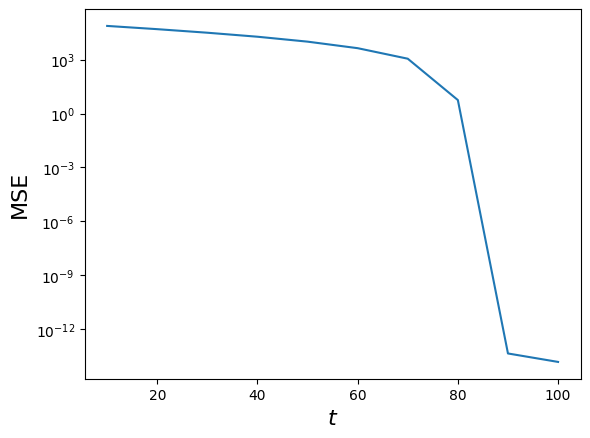

In [ ]:
### Defining  the constrained problem for cvxpy and solves it.
def lossFunValue(A, b, x):
  return cp.norm2(A @ x - b)**2

def funValue(A, b, x):
  return (0.5)*lossFunValue(A, b, x)


##Vary the tuning parameters t

t_values = np.linspace(10, 100, 10)
errors=[]
for ti in t_values:
  cvx = cp.Variable((n,1))
  t = cp.Parameter(nonneg=True)
  t.value = ti
  problem = cp.Problem(cp.Minimize(funValue(A, b, cvx)),[cp.norm1(cvx) <= t])
  problem.solve(warm_start = True)
  f_opt = funValue(A, b,cvx).value
  errors.append(f_opt)
plt.semilogy(t_values, errors)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$t$", fontsize=16)
plt.ylabel("MSE", fontsize=16)
plt.show()

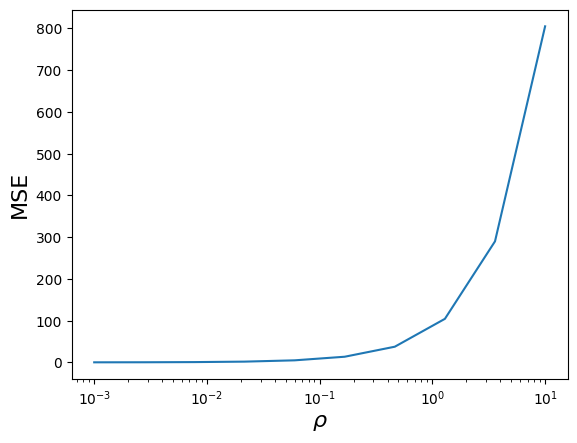

In [ ]:
def regularization(x):
  return cp.norm1(x)

def updatedFun(A, b, x,rho):
  return funValue(A,b,x)+rho*regularization(x)


##Vary the tuning parameters rho
rho_values = np.logspace(-3, 1, 10)
errors_rho = []

for rhoi in rho_values:
  cvx = cp.Variable((n,1))
  rho = cp.Parameter(nonneg=True)
  rho.value = rhoi
  problem = cp.Problem(cp.Minimize(updatedFun(A, b,cvx, rho)))
  problem.solve()
  f_opt = updatedFun(A, b,cvx, rho).value
  errors_rho.append(f_opt)

plt.plot(rho_values, errors_rho)
plt.xscale("log")
plt.xlabel(r"$\rho$", fontsize=16)
plt.ylabel("MSE", fontsize=16)
plt.show()

In [ ]:
rho = cp.Parameter(nonneg=True)
rho.value = 0.00001
problem = cp.Problem(cp.Minimize(updatedFun(A, b, cvx, rho)))
problem.solve()
prox_opt = updatedFun(A, b,cvx, rho).value
print(prox_opt)

0.0008077194212780168


In [ ]:
### Proximal gradient descent method
def getLossFunVal(A, b, x, reg):
  #Loss function for proximal gradient descent
  mse_loss = 0.5*(np.linalg.norm(b - np.dot(A, x))**2)
  reg_loss = reg*np.linalg.norm(x, ord = 1)
  tot_loss = mse_loss + reg_loss
  return tot_loss

def softThresh(grad, param):
  #Soft thresholding function for proximal gradient method
  prox_grad = np.zeros_like(grad)
  for i in range(prox_grad.shape[0]):
    if grad[i] > param:
      prox_grad[i] = grad[i] - param
    elif grad[i] < -1*param:
      prox_grad[i] = grad[i] + param
    elif abs(grad[i]) <= param:
      prox_grad[i] = 0
  return prox_grad

def proximalGradient(A, b, opt, reg):
  x = np.ones((A.shape[1], 1))
  num_epochs = 10000
  eigs, eigvecs = np.linalg.eigh(A.T@A)
  L = max(eigs)
  eta = 1/L
  obj = [0]
  subopt = []
  for e in tqdm(range(num_epochs)):
    f = getLossFunVal(A, b, x, reg)
    subopt.append(abs(f - opt))
    obj.append(f)
    grad = x + eta*np.dot(A.T, (b - np.dot(A, x)))
    x = softThresh(grad, reg*eta)
  return x, subopt
beta_prox, subopt_prox = proximalGradient(A, b, prox_opt, 0.0001)

100%|██████████| 10000/10000 [00:10<00:00, 919.30it/s]


In [ ]:
## Frank Wolfe Gradient Descent Method
def frankWolfe(gradient, l):
  s = np.zeros((gradient.shape[0], 1))
  if (gradient != 0).sum() == 0:
    return s
  else:
    a = abs(gradient)
    i = np.nonzero(a == max(a))[0][0]
    s[i] = - np.sign(gradient[i]) * l
    return s

def fw_updates(A, b, opt, t):
  x = np.ones((A.shape[1], 1))
  num_epochs = 10000
  obj = [0]
  subopt = []
  for e in tqdm(range(1, num_epochs)):
    gamma = 2/(e+1)
    f = getLossFunVal(A, b, x, 0)
    subopt.append(f-opt)
    if abs(f-opt) <= 1e-2:
      break
    else:
      obj.append(f)
      grad = A.T.dot(A.dot(x)-b)
      s_t = frankWolfe(grad, t)
      x = (1-gamma)*x + gamma*s_t
  return x, subopt

beta_fw, subopt_fw = fw_updates(A, b, prox_opt, 90)

100%|██████████| 9999/9999 [00:03<00:00, 3030.02it/s]


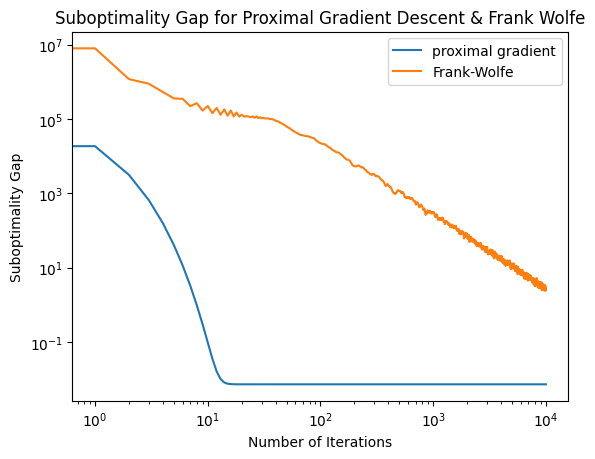

In [ ]:
import matplotlib.pyplot as plt
plt.plot(subopt_prox)
plt.plot(subopt_fw)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Iterations")
plt.ylabel("Suboptimality Gap")
plt.title("Suboptimality Gap for Proximal Gradient Descent & Frank Wolfe")
plt.legend(['proximal gradient', 'Frank-Wolfe'])
plt.show()

**Observations:**

In figure(1)  we plot the mean square error (mse) by varying the tuning parameter t . Here better MSE at larger number of t.

In figure(2) we plot the mean square error (mse) by varying the tuning parameter ρ . Here better MSE at smaller values of ρ.
We observe that at t=90 and ρ = 0.001 we attain the same minimizer for both the problems.
In Figures (3) , we plot the suboptimality gap of the proximal subgradient method and the Frank Wolfe method, respectively. We see that the Frank Wolfe method takes more than 1,00,000 iterations to converge, and the proximal gradient descent takes only a few 100 iterations. Thus, Frank Wolfe is much
slower as compared to the proximal gradient descent method.



---

